# Project 2 – Notebook

In [37]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn

You should consider upgrading via the '/Users/madhumithabharadwajgudmella/Downloads/Project2-main 4/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/madhumithabharadwajgudmella/Downloads/Project2-main 4/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/madhumithabharadwajgudmella/Downloads/Project2-main 4/venv/bin/python3 -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/madhumithabharadwajgudmella/Downloads/Project2-main 4/venv/bin/python3 -m pip install --upgrade pip' command.


In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [39]:
class BoostingTree:
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=1):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.model_weights = []

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def _log_loss_grad(self, y_true, y_pred_proba):
        return y_pred_proba - y_true

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        F = np.zeros(X.shape[0])

        for _ in range(self.n_estimators):
            prob = self._sigmoid(F)
            gradient = self._log_loss_grad(y, prob)
            tree = self._fit_stump(X, -gradient)
            pred = self._predict_stump(tree, X)
            F += self.learning_rate * pred
            self.models.append(tree)
            self.model_weights.append(self.learning_rate)

    def _fit_stump(self, X, residuals):
        m, n = X.shape
        best_feat, best_thresh, best_loss = None, None, float('inf')
        best_left, best_right = None, None

        for feature in range(n):
            thresholds = np.unique(X[:, feature])
            for thresh in thresholds:
                left = X[:, feature] <= thresh
                right = ~left
                if not np.any(left) or not np.any(right):
                    continue
                left_val = np.mean(residuals[left])
                right_val = np.mean(residuals[right])
                pred = np.where(left, left_val, right_val)
                loss = np.mean((residuals - pred)**2)

                if loss < best_loss:
                    best_feat = feature
                    best_thresh = thresh
                    best_left = left_val
                    best_right = right_val
                    best_loss = loss

        return {'feature': best_feat, 'threshold': best_thresh, 'left_val': best_left, 'right_val': best_right}

    def _predict_stump(self, tree, X):
        feature = X[:, tree['feature']]
        return np.where(feature <= tree['threshold'], tree['left_val'], tree['right_val'])

    def predict_proba(self, X):
        F = np.zeros(X.shape[0])
        for tree, weight in zip(self.models, self.model_weights):
            F += weight * self._predict_stump(tree, X)
        prob = self._sigmoid(F)
        return np.vstack([1 - prob, prob]).T

    def predict(self, X):
        return (self.predict_proba(X)[:, 1] >= 0.5).astype(int)


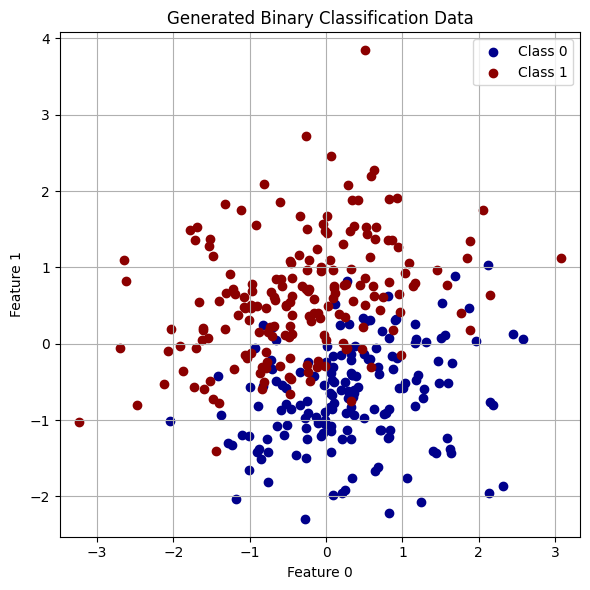

In [40]:
np.random.seed(42)
n_samples = 350
X = np.random.randn(n_samples, 2)
true_weights = np.random.randn(2)
y_raw = X @ true_weights + 0.5 * np.random.randn(n_samples)
y = (y_raw > 0).astype(int)

plt.figure(figsize=(6,6))
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], label="Class 0", color='darkblue')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], label="Class 1", color='darkred')
plt.title("Generated Binary Classification Data")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


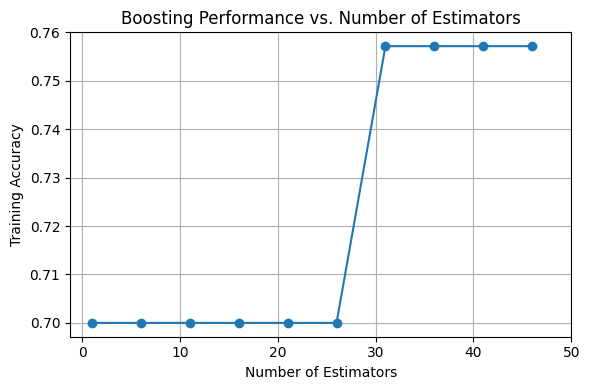

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

estimator_range = range(1, 51, 5)
accuracies = []

for n in estimator_range:
    model = BoostingTree(n_estimators=n, learning_rate=0.1)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(6, 4))
plt.plot(estimator_range, accuracies, marker='o')
plt.title("Boosting Performance vs. Number of Estimators")
plt.xlabel("Number of Estimators")
plt.ylabel("Training Accuracy")
plt.xticks(np.arange(0, 60, 10))
plt.grid(True)
plt.tight_layout()
plt.show()


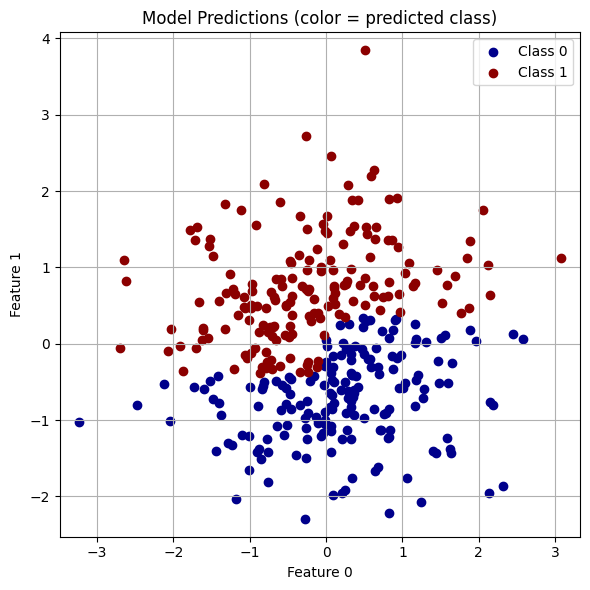

In [42]:
model = BoostingTree(n_estimators=100, learning_rate=0.1)
model.fit(X_train, y_train)

y_pred = model.predict(X)

plt.figure(figsize=(6,6))
plt.scatter(X[y_pred == 0][:, 0], X[y_pred == 0][:, 1], color='darkblue', label="Class 0")
plt.scatter(X[y_pred == 1][:, 0], X[y_pred == 1][:, 1], color='darkred', label="Class 1")
plt.title("Model Predictions (color = predicted class)")
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.axis("equal")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
